In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [7]:
train = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s5e3/sample_submission.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

all_data = pd.concat([train,test]) 
print('train:',train.shape)
print('test:',test.shape)
print('all data:',all_data.shape)

train: (2190, 13)
test: (730, 12)
all data: (2920, 13)


In [8]:
all_data.head(5)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1.0
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1.0
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1.0
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1.0
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0.0


In [9]:
all_data[2188:].head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1.0
2189,2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1.0
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3,NaN
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3,NaN
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9,NaN


In [10]:
test['winddirection'].shape[0]

730

In [11]:
#prettytable

from prettytable import PrettyTable 
mytable = PrettyTable(["Column", "Data Type","Missing in Train","Missing in Test"]) 

for column in all_data.columns:
    dtype = str(all_data[column].dtype)
    missing_train = f"{train[column].isna().sum()}/{train[column].shape[0]}"
    if column != 'rainfall':
        missing_test = f"{test[column].isna().sum()}/{test[column].shape[0]}"
    else:
        missing_test = '-'
        

    mytable.add_row([column,dtype,missing_train,missing_test])
print(mytable)

+---------------+-----------+------------------+-----------------+
|     Column    | Data Type | Missing in Train | Missing in Test |
+---------------+-----------+------------------+-----------------+
|       id      |   int64   |      0/2190      |      0/730      |
|      day      |   int64   |      0/2190      |      0/730      |
|    pressure   |  float64  |      0/2190      |      0/730      |
|    maxtemp    |  float64  |      0/2190      |      0/730      |
|  temparature  |  float64  |      0/2190      |      0/730      |
|    mintemp    |  float64  |      0/2190      |      0/730      |
|    dewpoint   |  float64  |      0/2190      |      0/730      |
|    humidity   |  float64  |      0/2190      |      0/730      |
|     cloud     |  float64  |      0/2190      |      0/730      |
|    sunshine   |  float64  |      0/2190      |      0/730      |
| winddirection |  float64  |      0/2190      |      1/730      |
|   windspeed   |  float64  |      0/2190      |      0/730   

In [12]:
print(set(test['winddirection']))

{130.0, 260.0, 10.0, 140.0, 270.0, 20.0, 280.0, 30.0, 160.0, 290.0, 40.0, 170.0, 300.0, 50.0, 180.0, 60.0, nan, 190.0, 70.0, 200.0, 80.0, 210.0, 90.0, 220.0, 100.0, 230.0, 110.0, 240.0, 120.0, 250.0}


In [13]:
#np.mean(all_data['winddirection']) #100
test['winddirection']=test['winddirection'].fillna(100)

In [14]:
test.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [15]:
train = train.drop('id',axis = 1)
test = test.drop('id',axis =1)
y = train['rainfall']

In [16]:
full_cor=train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
full_cor=full_cor.rename(columns={'level_0':'output','level_1':'features',0:'score'})
full_cor[full_cor['output']== 'rainfall']

,output,features,score
11,rainfall,rainfall,1.000000
44,rainfall,cloud,0.641191
49,rainfall,sunshine,0.555287
53,rainfall,humidity,0.454213
102,rainfall,windspeed,0.111625
109,rainfall,dewpoint,0.081965
110,rainfall,maxtemp,0.079304
121,rainfall,pressure,0.049886
123,rainfall,temparature,0.049660
127,rainfall,mintemp,0.026841


In [17]:
y

0       1
1       1
2       1
3       1
4       0
       ..
2185    1
2186    1
2187    1
2188    1
2189    1
Name: rainfall, Length: 2190, dtype: int64

## Seeing the importance with basic RF Classifier:

It is for only to see for new features how they contribute the model:

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def rf_importance(data,y):
    data = data.copy()
    data = data.drop('rainfall',axis =1)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    importances = model.feature_importances_

    # View as DataFrame
    feature_names = X_train.columns
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    importance_df.sort_values(by='importance', ascending=False, inplace=True)

    print(importance_df)

In [19]:
rf_importance(train,y)

          feature  importance
7           cloud    0.305378
8        sunshine    0.164061
6        humidity    0.097790
5        dewpoint    0.062488
0             day    0.061986
10      windspeed    0.060720
2         maxtemp    0.056119
3     temparature    0.052479
1        pressure    0.049940
4         mintemp    0.049510
9   winddirection    0.039529


I have just learnt that day number in numerical value can be misleading by the model. So, we need to say the days to the model in different way:

In [20]:
#Sin and Cos Representation in Day Number:

def geo_of_day(data):
    day = data['day'].copy()
    sin_data = np.sin(2 * np.pi * day/365)
    cos_data = np.cos(2 * np.pi * day/365)
    
    return sin_data,cos_data

train['sin_day'],train['cos_day']=geo_of_day(train)
test['sin_day'],test['cos_day']=geo_of_day(test)


In [21]:
rf_importance(train,y)

          feature  importance
7           cloud    0.272255
8        sunshine    0.166794
6        humidity    0.101294
5        dewpoint    0.056621
10      windspeed    0.052675
1        pressure    0.047925
4         mintemp    0.047487
3     temparature    0.045923
2         maxtemp    0.045804
0             day    0.043664
11        sin_day    0.043488
12        cos_day    0.043210
9   winddirection    0.032860


In [22]:
train.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,sin_day,cos_day
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,0.017213,0.999852
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0.034422,0.999407
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,0.051620,0.998667
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,0.068802,0.997630
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,0.085965,0.996298


In [23]:
def add_month_and_season(df):
    import pandas as pd

    # Define seasons
    winter = [12, 1, 2]
    spring = [3, 4, 5]
    summer = [6, 7, 8]
    autumn = [9, 10, 11]

    # Convert day to month (approximate method)
    df = df.copy()  # avoid changing the original DataFrame
    df['month'] = ((df['day'] - 1) // 31) + 1

    # Map each month to a season
    def get_season(month):
        if month in winter:
            return 1
        elif month in spring:
            return 2
        elif month in summer:
            return 3
        elif month in autumn:
            return 4
        else:
            return pd.NA  # for safety

    df['season'] = df['month'].apply(get_season).astype('Int64')  # supports NaN

    return df

train=add_month_and_season(train)
test = add_month_and_season(test)

In [24]:
rf_importance(train,y)

          feature  importance
7           cloud    0.241219
8        sunshine    0.177141
6        humidity    0.106920
5        dewpoint    0.053864
10      windspeed    0.052635
2         maxtemp    0.048299
3     temparature    0.046470
1        pressure    0.045494
11        sin_day    0.044744
4         mintemp    0.044616
0             day    0.043560
12        cos_day    0.041619
9   winddirection    0.032070
13          month    0.014772
14         season    0.006575


Here, season info has better meanings than day and month. But sin and cos day is still better than anyone. I think we got our best from the day info. Lets focus on the other features. 

In [25]:
#wind direction might affect the could so rainfall maybe. Lets go deeper:

print(set(train['winddirection']))
#lets categorise them by 45degree in 8 categories:
temp = []

def wind_direct_cat(data):

    bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
    labels = [1,2,3,4,5,6,7,8] #east, upper north easth, lower north east,north, upper north west,lower north west etc,etc,,,,
    data['wind_direct_cat'] = pd.cut(data['winddirection'], bins=bins, labels=labels, right=False)

    return data
    
train = wind_direct_cat(train)   
test = wind_direct_cat(test)

{130.0, 260.0, 10.0, 140.0, 270.0, 15.0, 20.0, 150.0, 280.0, 25.0, 30.0, 160.0, 290.0, 40.0, 170.0, 300.0, 50.0, 180.0, 60.0, 190.0, 65.0, 70.0, 200.0, 75.0, 80.0, 210.0, 90.0, 220.0, 100.0, 230.0, 250.3, 110.0, 240.0, 120.0, 250.0}


In [26]:
rf_importance(train,y)

            feature  importance
7             cloud    0.270847
8          sunshine    0.168884
6          humidity    0.097938
5          dewpoint    0.054903
2           maxtemp    0.047474
1          pressure    0.047049
10        windspeed    0.046027
4           mintemp    0.043320
3       temparature    0.042074
0               day    0.041934
11          sin_day    0.041311
12          cos_day    0.038536
9     winddirection    0.028540
13            month    0.013523
15  wind_direct_cat    0.012857
14           season    0.004781


In [27]:
full_cor=train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
full_cor=full_cor.rename(columns={'level_0':'output','level_1':'features',0:'score'})
full_cor[full_cor['output']== 'rainfall']

,output,features,score
6,rainfall,rainfall,1.000000
83,rainfall,cloud,0.641191
91,rainfall,sunshine,0.555287
95,rainfall,humidity,0.454213
199,rainfall,windspeed,0.111625
209,rainfall,dewpoint,0.081965
211,rainfall,maxtemp,0.079304
216,rainfall,sin_day,0.075008
230,rainfall,pressure,0.049886
232,rainfall,temparature,0.049660


Wind direct cat doubled its score, which is good. Go to make some relation btw wind direction, wind speed and cloud...

> Lets calculate the wind vector: wind speed *  wind direction in cos and in sin


In [28]:
type(train['winddirection'][0])

numpy.float64

In [29]:
#wind_vector_x = wind_speed * cos(wind_direction)
#wind_vector_y = wind_speed * sin(wind_direction)

train['wind_vector_x'] = train['windspeed'] * np.sin(np.radians(train['winddirection']))
train['wind_vector_y'] = train['windspeed'] * np.cos(np.radians(train['winddirection']))

test['wind_vector_x'] = test['windspeed'] * np.sin(np.radians(test['winddirection']))
test['wind_vector_y'] = test['windspeed'] * np.cos(np.radians(test['winddirection']))


In [30]:
rf_importance(train,y)

            feature  importance
7             cloud    0.261272
8          sunshine    0.166221
6          humidity    0.092149
5          dewpoint    0.047772
17    wind_vector_y    0.044171
2           maxtemp    0.042137
1          pressure    0.041414
16    wind_vector_x    0.040211
10        windspeed    0.039178
0               day    0.037535
11          sin_day    0.036505
3       temparature    0.035116
4           mintemp    0.035072
12          cos_day    0.032679
9     winddirection    0.023048
13            month    0.012490
15  wind_direct_cat    0.008493
14           season    0.004536


In [31]:
#If wind is strong and pressure is low, the value is high → possibly indicating rain.
#If pressure is high, the value drops, even if wind is strong.

train['wspeed_and_pressure'] = train['windspeed'] / train['pressure']
test['wspeed_and_pressure'] = test['windspeed'] / test['pressure']


In [32]:
rf_importance(train,y)

                feature  importance
7                 cloud    0.264612
8              sunshine    0.156304
6              humidity    0.088723
5              dewpoint    0.046529
2               maxtemp    0.042542
17        wind_vector_y    0.038294
0                   day    0.037729
3           temparature    0.037604
16        wind_vector_x    0.036952
18  wspeed_and_pressure    0.036511
1              pressure    0.034902
10            windspeed    0.034682
11              sin_day    0.034204
4               mintemp    0.031612
12              cos_day    0.031405
9         winddirection    0.022073
13                month    0.012757
15      wind_direct_cat    0.007324
14               season    0.005240


In [33]:
full_cor=train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
full_cor=full_cor.rename(columns={'level_0':'output','level_1':'features',0:'score'})
full_cor[full_cor['output']== 'rainfall']

,output,features,score
9,rainfall,rainfall,1.000000
106,rainfall,cloud,0.641191
120,rainfall,sunshine,0.555287
135,rainfall,humidity,0.454213
280,rainfall,wspeed_and_pressure,0.112955
282,rainfall,windspeed,0.111625
295,rainfall,dewpoint,0.081965
296,rainfall,maxtemp,0.079304
301,rainfall,wind_vector_x,0.075039
302,rainfall,sin_day,0.075008


That's good, because i extracted the better feature which is wspeed_and_pressure. it is much better than wind speed and pressure.

Lets focus on temperature and dew point. I may extract better features from them or combine them:
- Dew point is the term of temperature. When it is high, moisture is high in the air.
- Also i see cloud is playing very important role for that. Lets combine it:

In [34]:
# i would expect that cloud dew factor is high when rainfall is high, lets see
train['min_temp_and_dew_diff'] = (train['mintemp'] - train['dewpoint']).abs()
test['min_temp_and_dew_diff'] = (test['mintemp'] - test['dewpoint']).abs()

#train['cloud_dew_factor'] = train['cloud']/(train['min_temp_and_dew_diff']


In [35]:
rf_importance(train,y)

                  feature  importance
7                   cloud    0.250174
8                sunshine    0.148997
6                humidity    0.086637
19  min_temp_and_dew_diff    0.052708
5                dewpoint    0.039642
17          wind_vector_y    0.037000
2                 maxtemp    0.036715
18    wspeed_and_pressure    0.036182
16          wind_vector_x    0.035798
0                     day    0.035393
1                pressure    0.035187
3             temparature    0.034876
11                sin_day    0.034812
10              windspeed    0.030967
12                cos_day    0.029847
4                 mintemp    0.026890
9           winddirection    0.021011
13                  month    0.012896
15        wind_direct_cat    0.009035
14                 season    0.005233


min_temp_and_dew_diff parameter got better score than min_temp and dew_point. It is incredible.

In [36]:
print(min(train['humidity']))
print(min(test['humidity']))

39.0
39.0


In [37]:
print(min(train['maxtemp']))
print(min(test['maxtemp']))
print(min(train['min_temp_and_dew_diff']))

10.4
7.4
0.0


In [38]:
#lets some interaction btw features:

#lets go with cloud:humidiy ratio
train['cloud_humid_ratio'] = train['cloud']/train['humidity'] #i checked that it never goes to inf.
test['cloud_humid_ratio'] = test['cloud']/test['humidity'] #i checked that it never goes to inf.

train['rolling_temp_and_dew_diff_3d'] = train['min_temp_and_dew_diff'].rolling(window=3, min_periods=1).mean()
train['rolling_pressure_3d'] = train['pressure'].rolling(window=3, min_periods=1).mean()
train['rolling_humid_3d'] = train['humidity'].rolling(window=3, min_periods=1).mean()

train['rolling_temp_and_dew_diff_7d'] = train['min_temp_and_dew_diff'].rolling(window=7, min_periods=1).mean()
train['rolling_pressure_7d'] = train['pressure'].rolling(window=7, min_periods=1).mean()
train['rolling_humid_7d'] = train['humidity'].rolling(window=7, min_periods=1).mean()

test['rolling_temp_and_dew_diff_3d'] = test['min_temp_and_dew_diff'].rolling(window=3, min_periods=1).mean()
test['rolling_pressure_3d'] = test['pressure'].rolling(window=3, min_periods=1).mean()
test['rolling_humid_3d'] = test['humidity'].rolling(window=3, min_periods=1).mean()

test['rolling_temp_and_dew_diff_7d'] = test['min_temp_and_dew_diff'].rolling(window=7, min_periods=1).mean()
test['rolling_pressure_7d'] = test['pressure'].rolling(window=7, min_periods=1).mean()
test['rolling_humid_7d'] = test['humidity'].rolling(window=7, min_periods=1).mean()

In [39]:
rf_importance(train,y)

                         feature  importance
7                          cloud    0.174546
20             cloud_humid_ratio    0.138495
8                       sunshine    0.100054
6                       humidity    0.073814
19         min_temp_and_dew_diff    0.036000
23              rolling_humid_3d    0.033021
24  rolling_temp_and_dew_diff_7d    0.032695
17                 wind_vector_y    0.028974
21  rolling_temp_and_dew_diff_3d    0.026715
16                 wind_vector_x    0.026206
5                       dewpoint    0.025814
26              rolling_humid_7d    0.025652
11                       sin_day    0.025198
25           rolling_pressure_7d    0.024449
18           wspeed_and_pressure    0.023336
2                        maxtemp    0.023333
22           rolling_pressure_3d    0.022144
3                    temparature    0.021675
0                            day    0.021647
4                        mintemp    0.021590
10                     windspeed    0.021491
1         

In [40]:
train['rolling_temp_and_dew_diff_14d'] = train['min_temp_and_dew_diff'].rolling(window=14, min_periods=1).mean()
train['rolling_pressure_14d'] = train['pressure'].rolling(window=14, min_periods=1).mean()
train['rolling_humid_14d'] = train['humidity'].rolling(window=14, min_periods=1).mean()

test['rolling_temp_and_dew_diff_14d'] = test['min_temp_and_dew_diff'].rolling(window=14, min_periods=1).mean()
test['rolling_pressure_14d'] = test['pressure'].rolling(window=14, min_periods=1).mean()
test['rolling_humid_14d'] = test['humidity'].rolling(window=14, min_periods=1).mean()


In [41]:
rf_importance(train,y)

                          feature  importance
7                           cloud    0.187045
8                        sunshine    0.109688
20              cloud_humid_ratio    0.106667
6                        humidity    0.069300
19          min_temp_and_dew_diff    0.036483
23               rolling_humid_3d    0.031407
24   rolling_temp_and_dew_diff_7d    0.026801
17                  wind_vector_y    0.026510
21   rolling_temp_and_dew_diff_3d    0.025851
5                        dewpoint    0.024006
18            wspeed_and_pressure    0.023672
26               rolling_humid_7d    0.023320
28           rolling_pressure_14d    0.022978
11                        sin_day    0.022621
29              rolling_humid_14d    0.022479
16                  wind_vector_x    0.021098
0                             day    0.020986
22            rolling_pressure_3d    0.020656
2                         maxtemp    0.020041
25            rolling_pressure_7d    0.020000
10                      windspeed 

In [42]:
'''
# How quantile works:
import pandas as pd

data = pd.Series([10, 20, 30, 40, 50])

print(data.quantile(0.5))   # Output: 30.0  -> Middle value (median)
print(data.quantile(0.25))  # Output: 20.0  -> 25% of values are below this
print(data.quantile(0.75))  # Output: 40.0  -> 75% of values are below this
print(data.quantile(0.90))  


30.0
20.0
40.0
46.0
'''

'\n# How quantile works:\nimport pandas as pd\n\ndata = pd.Series([10, 20, 30, 40, 50])\n\nprint(data.quantile(0.5))   # Output: 30.0  -> Middle value (median)\nprint(data.quantile(0.25))  # Output: 20.0  -> 25% of values are below this\nprint(data.quantile(0.75))  # Output: 40.0  -> 75% of values are below this\nprint(data.quantile(0.90))  \n\n\n30.0\n20.0\n40.0\n46.0\n'

In [43]:
#best and worst:
train['extreme_temp'] = (
    (train['temparature']>train['temparature'].quantile(0.90)) |
    (train['temparature']<train['temparature'].quantile(0.10))
    ).astype(int)

train['extreme_press'] = (
    (train['pressure']>train['pressure'].quantile(0.90)) |
    (train['pressure']<train['pressure'].quantile(0.10))
    ).astype(int)

train['extreme_humid'] = (
    (train['humidity']>train['humidity'].quantile(0.90)) |
    (train['humidity']<train['humidity'].quantile(0.10))
    ).astype(int)

#best and worst:
test['extreme_temp'] = (
    (test['temparature']>test['temparature'].quantile(0.90)) |
    (test['temparature']<test['temparature'].quantile(0.10))
    ).astype(int)

test['extreme_press'] = (
    (test['pressure']>test['pressure'].quantile(0.90)) |
    (test['pressure']<test['pressure'].quantile(0.10))
    ).astype(int)

test['extreme_humid'] = (
    (test['humidity']>test['humidity'].quantile(0.90)) |
    (test['humidity']<test['humidity'].quantile(0.10))
    ).astype(int)


In [44]:
rf_importance(train,y)

                          feature  importance
7                           cloud    0.181974
20              cloud_humid_ratio    0.114795
8                        sunshine    0.098064
6                        humidity    0.065674
19          min_temp_and_dew_diff    0.031496
26               rolling_humid_7d    0.030433
5                        dewpoint    0.028578
23               rolling_humid_3d    0.028504
24   rolling_temp_and_dew_diff_7d    0.028033
17                  wind_vector_y    0.024506
18            wspeed_and_pressure    0.023245
21   rolling_temp_and_dew_diff_3d    0.023100
2                         maxtemp    0.022242
16                  wind_vector_x    0.022232
29              rolling_humid_14d    0.021998
28           rolling_pressure_14d    0.021623
25            rolling_pressure_7d    0.021498
11                        sin_day    0.021374
3                     temparature    0.021111
22            rolling_pressure_3d    0.021043
0                             day 

In [45]:
#min_temp_and_dew_diff and humidity interaction
train['min_temp_diff_humid_interact'] = train['min_temp_and_dew_diff']*train['humidity']
test['min_temp_diff_humid_interact'] = test['min_temp_and_dew_diff']*test['humidity']
#min_temp_and_dew_diff and pressure interaction
train['min_temp_diff_pressure_interact'] = train['min_temp_and_dew_diff']*train['pressure']
test['min_temp_diff_pressure_interact'] = test['min_temp_and_dew_diff']*test['pressure']
#cloud and wind_vector_y and windspeed
train['cloud_wind_y_wspeed'] = train['cloud'] * train['wind_vector_y']*train['windspeed']
test['cloud_wind_y_wspeed'] = test['cloud'] * test['wind_vector_y']*test['windspeed']

In [46]:
rf_importance(train,y)

                            feature  importance
7                             cloud    0.175557
20                cloud_humid_ratio    0.128540
8                          sunshine    0.094934
6                          humidity    0.053255
23                 rolling_humid_3d    0.033251
34  min_temp_diff_pressure_interact    0.030325
19            min_temp_and_dew_diff    0.025574
33     min_temp_diff_humid_interact    0.025360
24     rolling_temp_and_dew_diff_7d    0.023497
29                rolling_humid_14d    0.022163
35              cloud_wind_y_wspeed    0.022013
17                    wind_vector_y    0.021677
21     rolling_temp_and_dew_diff_3d    0.021469
16                    wind_vector_x    0.020522
5                          dewpoint    0.019971
25              rolling_pressure_7d    0.019450
28             rolling_pressure_14d    0.019310
26                 rolling_humid_7d    0.019248
18              wspeed_and_pressure    0.018908
11                          sin_day    0

In [47]:
train['pressure_3d_std'] = train['pressure'].rolling(window=3).std().fillna(0)
train['pressure_7d_std'] = train['pressure'].rolling(window=7).std().fillna(0)
train['pressure_14d_std'] = train['pressure'].rolling(window=14).std().fillna(0)

train['w_speed_3d_std'] = train['windspeed'].rolling(window=3).std().fillna(0)
train['w_speed_7d_std'] = train['windspeed'].rolling(window=7).std().fillna(0)
train['w_speed_14d_std'] = train['windspeed'].rolling(window=14).std().fillna(0)

train['humid_3d_std'] = train['humidity'].rolling(window=3).std().fillna(0)
train['humid_7d_std'] = train['humidity'].rolling(window=7).std().fillna(0)
train['humid_14d_std'] = train['humidity'].rolling(window=14).std().fillna(0)

train['cloud_3d_std'] = train['cloud'].rolling(window=3).std().fillna(0)
train['cloud_7d_std'] = train['cloud'].rolling(window=7).std().fillna(0)
train['cloud_14d_std'] = train['cloud'].rolling(window=14).std().fillna(0)


In [48]:
# PRESSURE rolling std
test['pressure_3d_std'] = test['pressure'].rolling(window=3).std().fillna(0)
test['pressure_7d_std'] = test['pressure'].rolling(window=7).std().fillna(0)
test['pressure_14d_std'] = test['pressure'].rolling(window=14).std().fillna(0)

# WINDSPEED rolling std
test['w_speed_3d_std'] = test['windspeed'].rolling(window=3).std().fillna(0)
test['w_speed_7d_std'] = test['windspeed'].rolling(window=7).std().fillna(0)
test['w_speed_14d_std'] = test['windspeed'].rolling(window=14).std().fillna(0)

# HUMIDITY rolling std
test['humid_3d_std'] = test['humidity'].rolling(window=3).std().fillna(0)
test['humid_7d_std'] = test['humidity'].rolling(window=7).std().fillna(0)
test['humid_14d_std'] = test['humidity'].rolling(window=14).std().fillna(0)

# CLOUD rolling std
test['cloud_3d_std'] = test['cloud'].rolling(window=3).std().fillna(0)
test['cloud_7d_std'] = test['cloud'].rolling(window=7).std().fillna(0)
test['cloud_14d_std'] = test['cloud'].rolling(window=14).std().fillna(0)


In [49]:
rf_importance(train,y)

                            feature  importance
7                             cloud    0.137486
8                          sunshine    0.106375
20                cloud_humid_ratio    0.098691
6                          humidity    0.058754
45                     cloud_3d_std    0.026069
34  min_temp_diff_pressure_interact    0.025272
19            min_temp_and_dew_diff    0.021694
46                     cloud_7d_std    0.020494
33     min_temp_diff_humid_interact    0.018955
26                 rolling_humid_7d    0.018761
23                 rolling_humid_3d    0.018141
43                     humid_7d_std    0.017958
24     rolling_temp_and_dew_diff_7d    0.017410
5                          dewpoint    0.017003
21     rolling_temp_and_dew_diff_3d    0.016804
47                    cloud_14d_std    0.016692
25              rolling_pressure_7d    0.016553
35              cloud_wind_y_wspeed    0.016025
11                          sin_day    0.015473
17                    wind_vector_y    0

In [50]:
#Control if train and test is the same

cntrl= len(train.columns)
chc = 0
for col in train.columns:
    chc +=1
    if col in test.columns:
        if chc == cntrl:
            print('... equal')
        chc +=1

## Max/Min Normalization

In [51]:
def normalization_features(data):
    max_val=max(data)
    min_val=min(data)

    divider = max_val-min_val+0.000001
    
    norm_data = list(map(lambda x: (x-min_val)/divider,data))
    return norm_data

In [52]:
train.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall', 'sin_day', 'cos_day', 'month', 'season', 'wind_direct_cat',
       'wind_vector_x', 'wind_vector_y', 'wspeed_and_pressure',
       'min_temp_and_dew_diff', 'cloud_humid_ratio',
       'rolling_temp_and_dew_diff_3d', 'rolling_pressure_3d',
       'rolling_humid_3d', 'rolling_temp_and_dew_diff_7d',
       'rolling_pressure_7d', 'rolling_humid_7d',
       'rolling_temp_and_dew_diff_14d', 'rolling_pressure_14d',
       'rolling_humid_14d', 'extreme_temp', 'extreme_press', 'extreme_humid',
       'min_temp_diff_humid_interact', 'min_temp_diff_pressure_interact',
       'cloud_wind_y_wspeed', 'pressure_3d_std', 'pressure_7d_std',
       'pressure_14d_std', 'w_speed_3d_std', 'w_speed_7d_std',
       'w_speed_14d_std', 'humid_3d_std', 'humid_7d_std', 'humid_14d_std',
       'cloud_3d_std', 'cloud_7d_std', 'cloud_14d_std'],
      dty

In [53]:
y = train['rainfall']
X = train.drop('rainfall',axis = 1)
norm_train={}
for each in X.columns:
    if each !='rainfall':
        norm_train[each] = normalization_features(X[each])
    else:
         norm_train[each] = X[each]
norm_train = pd.DataFrame(norm_train)

In [56]:
norm_test={}
for each in test.columns:
    norm_test[each] = normalization_features(test[each])
   
norm_test = pd.DataFrame(norm_test)

In [57]:
norm_train.head(5) 

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,...,pressure_14d_std,w_speed_3d_std,w_speed_7d_std,w_speed_14d_std,humid_3d_std,humid_7d_std,humid_14d_std,cloud_3d_std,cloud_7d_std,cloud_14d_std
0,0.000000,0.516854,0.421875,0.547718,0.616279,0.729630,0.813559,0.877551,0.090909,0.172414,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.002747,0.575843,0.226562,0.394191,0.457364,0.581481,0.949153,0.908163,0.000000,0.137931,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.005495,0.705056,0.351562,0.360996,0.410853,0.355556,0.610169,0.459184,0.685950,0.206897,...,0.0,0.096661,0.0,0.0,0.341677,0.0,0.0,0.515933,0.0,0.0
3,0.008242,0.404494,0.300781,0.431535,0.500000,0.633333,0.949153,0.948980,0.000000,0.172414,...,0.0,0.356663,0.0,0.0,0.391931,0.0,0.0,0.558960,0.0,0.0
4,0.010989,0.640449,0.425781,0.456432,0.434109,0.366667,0.220339,0.438776,0.297521,0.103448,...,0.0,0.342125,0.0,0.0,0.730349,0.0,0.0,0.594103,0.0,0.0


In [58]:
norm_test

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,...,pressure_14d_std,w_speed_3d_std,w_speed_7d_std,w_speed_14d_std,humid_3d_std,humid_7d_std,humid_14d_std,cloud_3d_std,cloud_7d_std,cloud_14d_std
0,0.000000,0.605590,0.355634,0.382239,0.341365,0.558052,0.966102,0.99,0.000000,0.137931,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.002747,0.512422,0.355634,0.409266,0.465863,0.565543,0.983051,0.99,0.000000,0.137931,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.005495,0.742236,0.133803,0.173745,0.208835,0.333333,0.796610,0.96,0.000000,0.103448,...,0.000000,0.395392,0.000000,0.000000,0.183042,0.000000,0.000000,0.031449,0.000000,0.000000
3,0.008242,0.711180,0.464789,0.440154,0.441767,0.355805,0.610169,0.45,0.601695,0.034483,...,0.000000,0.720607,0.000000,0.000000,0.331011,0.000000,0.000000,0.551023,0.000000,0.000000
4,0.010989,0.689441,0.306338,0.305019,0.088353,0.161049,0.491525,0.49,0.779661,0.034483,...,0.000000,0.801873,0.000000,0.000000,0.273047,0.000000,0.000000,0.514942,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.989011,0.645963,0.380282,0.451737,0.477912,0.513109,0.966102,0.95,0.000000,0.034483,...,0.320051,0.185381,0.395356,0.411861,0.096732,0.365002,0.464282,0.062897,0.133831,0.381253
726,0.991758,0.363354,0.556338,0.471042,0.473896,0.599251,0.661017,0.80,0.135593,0.103448,...,0.439376,0.198034,0.326283,0.407005,0.321763,0.370206,0.456691,0.157243,0.157300,0.205189
727,0.994505,0.704969,0.478873,0.486486,0.514056,0.580524,0.898305,0.96,0.000000,0.137931,...,0.461207,0.274261,0.229049,0.407041,0.284418,0.346171,0.437887,0.162738,0.148473,0.177554
728,0.997253,0.447205,0.478873,0.544402,0.622490,0.741573,0.932203,0.93,0.000000,0.137931,...,0.495289,0.399529,0.339423,0.474660,0.262335,0.270756,0.449067,0.154422,0.150915,0.181022


In [59]:
print(norm_test.columns,len(norm_test.columns))
print(norm_train.columns,len(norm_train.columns))

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'sin_day', 'cos_day', 'month', 'season', 'wind_direct_cat',
       'wind_vector_x', 'wind_vector_y', 'wspeed_and_pressure',
       'min_temp_and_dew_diff', 'cloud_humid_ratio',
       'rolling_temp_and_dew_diff_3d', 'rolling_pressure_3d',
       'rolling_humid_3d', 'rolling_temp_and_dew_diff_7d',
       'rolling_pressure_7d', 'rolling_humid_7d',
       'rolling_temp_and_dew_diff_14d', 'rolling_pressure_14d',
       'rolling_humid_14d', 'extreme_temp', 'extreme_press', 'extreme_humid',
       'min_temp_diff_humid_interact', 'min_temp_diff_pressure_interact',
       'cloud_wind_y_wspeed', 'pressure_3d_std', 'pressure_7d_std',
       'pressure_14d_std', 'w_speed_3d_std', 'w_speed_7d_std',
       'w_speed_14d_std', 'humid_3d_std', 'humid_7d_std', 'humid_14d_std',
       'cloud_3d_std', 'cloud_7d_std', 'cloud_14d_std'],
      dtype='object')

## Get the overall understanding with feature importance:

In [130]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks


from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (1533, 40)
y_train: (1533,)
X_test: (657, 40)
y_test: (657,)


### Very Basic Overview with RandomForest 

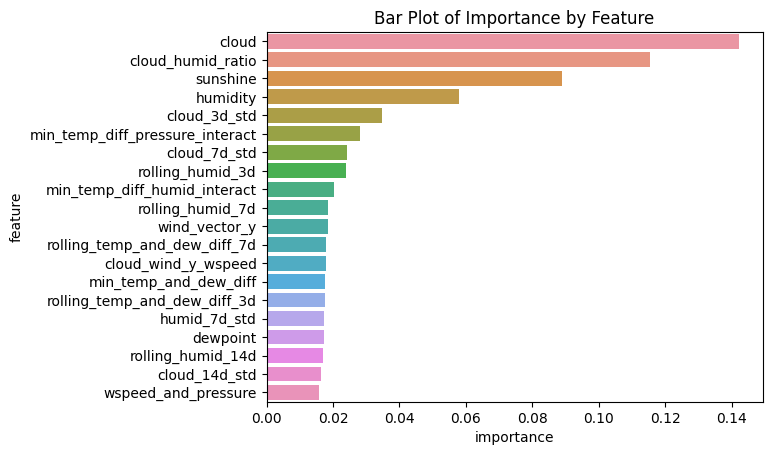

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns


#The first feature:
"""
'day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
'sin_day', 'cos_day', 'month', 'season', 'wind_direct_cat',
'wind_vector_x', 'wind_vector_y', 'wspeed_and_pressure',
'min_temp_and_dew_diff' + cloud_sun_ratio
"""
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)


model.fit(X_train, y_train)

importances = model.feature_importances_

# View as DataFrame
import pandas as pd
feature_names = X_train.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
top_20 = importance_df[:20]

sns.barplot(data=top_20.reset_index(), x='importance', y='feature')

# Optionally add a title and labels
plt.title('Bar Plot of Importance by Feature')
plt.xlabel('importance')
plt.ylabel('feature')

plt.show()


### Benefit XGB LGB and CatBoost

In [238]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score


def check_other_model(X_train,y_train,model_name):

    xgb_params = {
            'n_jobs': -1,
            'eval_metric': 'logloss',
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': 42,
        }
    
    lgb_params = {
            'objective': 'binary',
            'metric': 'logloss',
            'boosting_type': 'gbdt',
            'random_state': 42,
            'verbose':-1
        }
    cb_params = {
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'random_state': 42,
        }

    #Set the model
    if model_name == 'lgb':
        model=LGBMClassifier(**lgb_params)
        print('LGB is running now!')
        print('-------'*10)
    elif model_name == 'xgb':
        model = XGBClassifier(**xgb_params)
        print('XGB is running now!')
        print('-------'*10)
    elif model_name == 'catboost':
        model = CatBoostClassifier(**cb_params,verbose=False)
        print('CatBoostClassifier is running now!')
        print('-------'*10)
    else:
        print('Wrong Model Selection')

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    auc_scores = []
    feature_importances_list = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold = X_train.iloc[train_index]
        X_val_fold = X_train.iloc[val_index]
        y_train_fold = y_train.iloc[train_index]
        y_val_fold = y_train.iloc[val_index]

        pred=model.fit(X_train_fold,y_train_fold)
        y_pred = model.predict_proba(X_val_fold)[:,1]
        
        auc_scores.append(roc_auc_score(y_val_fold, y_pred)) #save it in each fold
        feature_importances = model.feature_importances_ 
        feature_importances_list.append(feature_importances) #save it in each fold
        
    #out of fold:
    avg_auc_score = np.mean(auc_scores)
    print(f"Average AUC Score for {model_name}: {avg_auc_score:.3f}")
    
    avg_f_importance_list = np.mean(feature_importances_list, axis=0)
    imp_list = []
    
    for inx, each_scr in enumerate (avg_f_importance_list):
        imp_list.append((X_train.columns[inx],each_scr))

    importance_df = pd.DataFrame(imp_list, columns=['Feature', 'Importance'])
    
    importance_df = importance_df.sort_values('Importance', ascending=False)        
    
    print(importance_df[:20].reset_index(drop=True))

    return importance_df[:40]['Feature'] #return top 40 feature
    

In [239]:
def best_feature_finder(xgb,lgb,cb):
    common_elements = set(xgb) & set(lgb) & set(cb)
    print("Best Features in 3 models: \n", common_elements)
    return common_elements

In [240]:
top_40_xgb =check_other_model(X_train,y_train,'xgb')
top_40_lgb = check_other_model(X_train,y_train,'lgb')
top_40_cb = check_other_model(X_train,y_train,'catboost')

feature_selection =best_feature_finder(top_40_xgb,top_40_lgb,top_40_cb)

XGB is running now!
----------------------------------------------------------------------
Average AUC Score for xgb: 0.890
                         Feature  Importance
0                          cloud    0.255684
1           rolling_pressure_14d    0.033931
2                        maxtemp    0.030821
3                       sunshine    0.030134
4                       dewpoint    0.025789
5                       humidity    0.024117
6                       pressure    0.023043
7   rolling_temp_and_dew_diff_7d    0.023019
8            rolling_pressure_7d    0.022755
9   rolling_temp_and_dew_diff_3d    0.022175
10                           day    0.022001
11           cloud_wind_y_wspeed    0.021835
12                 wind_vector_x    0.021028
13                       mintemp    0.020506
14                 wind_vector_y    0.020044
15                  cloud_7d_std    0.019921
16                  humid_7d_std    0.019179
17                     windspeed    0.019143
18                   

## XGB Result:

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report


#from xgboost.callback import EarlyStopping


#parameter setting

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, 10),            # More range, try slower & faster learning
    'max_depth': [3, 5, 7, 9, 12, 15],                      # Allow deeper trees (can overfit, but try!)
    'n_estimators': [100, 300, 500, 800, 1000],             # More boosting rounds for deeper learning
    'min_child_weight': [1, 3, 5, 7],                       # Regularization, higher = less complex
    'subsample': np.linspace(0.5, 1.0, 6),                  # More range for row sampling
    'colsample_bytree': np.linspace(0.5, 1.0, 6),           # Column sampling → helpful to avoid overfitting
    'gamma': np.linspace(0, 1, 6),                          # More granular split regularization
    'reg_alpha': np.linspace(0, 2, 6),                      # L1 regularization (sparsity)
    'reg_lambda': np.linspace(0.5, 5, 6),                   # L2 regularization (shrinkage)
    'scale_pos_weight': [1, 2, 5, 10],                      # Helpful if your data is imbalanced
    'max_bin': [256, 512, 1024, 2048],                      # Histogram bins — can impact accuracy on large data
    'tree_method': ['hist'],                               # Efficient tree construction
    'verbosity': [1],                                       # Silent mode
    'random_state': [42],                                   # For reproducibility
}


X_train, X_test, y_train, y_test = train_test_split(norm_train, y, test_size=0.3, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Step 7: Predict and Evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best Parameters: {random_search.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
prediction = best_model.predict(norm_test)

In [ ]:
y_test

Go on learning:

# Start the training with natural correlation:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_train, y, test_size=0.3, random_state=42)

In [ ]:
def mymodel():

    model = keras.Sequential([
        #input layer
        layers.Input(shape = X_train.shape[1:]), #(11,1)
        #first layer
        layers.Dense(128),
        layers.ReLU(),
        layers.BatchNormalization(),

        #second layer
        layers.Dense(64),
        layers.ReLU(),
        layers.BatchNormalization(),

         #third layer
        layers.Dense(32),
        layers.ReLU(),
        layers.BatchNormalization(),

        layers.Dense(1,activation ='sigmoid')
    ])
    return model

mymodel().summary()

In [ ]:
from tensorflow.keras import layers, callbacks

def mymodel():

    model = keras.Sequential([
        #input layer
        layers.Input(shape = X_train.shape[1:]), #(11,1)
        #first layer
        layers.Dense(128),
        layers.ReLU(),
        layers.BatchNormalization(),

        #second layer
        layers.Dense(64),
        layers.ReLU(),
        layers.BatchNormalization(),

         #third layer
        layers.Dense(32),
        layers.ReLU(),
        layers.BatchNormalization(),

        layers.Dense(1,activation ='sigmoid')
    ])
    return model

earlystop = callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'min',
    patience = 5,
    restore_best_weights=True  # Restore the best model weights
)

model_mid_parameter = mymodel()

model_mid_parameter.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Define optimizer
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy']  # Track accuracy during training
)

# Train the model

model_mid_parameter.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),callbacks = [earlystop])

print(f"Best Val Loss: {min(model_mid_parameter.history.history['val_loss'])}")
print(f"Best Val Acc: {max(model_mid_parameter.history.history['val_accuracy'])}")

In [ ]:
Best Val Loss: 0.38241690397262573
Best Val Acc: 0.8554033637046814

In [ ]:
from tensorflow.keras import layers, callbacks

def highmodel():

    model = keras.Sequential([
        #input layer
        layers.Input(shape = X_train.shape[1:]), #(11,1)
        #first layer
        layers.Dense(512),
        layers.ReLU(),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        #second layer
        layers.Dense(256),
        layers.ReLU(),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

         #third layer
        layers.Dense(128),
        layers.ReLU(),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(64),
        layers.ReLU(),
        layers.BatchNormalization(),

        layers.Dense(1,activation ='sigmoid')
    ])
    return model

earlystop = callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'min',
    patience = 5,
    restore_best_weights=True  # Restore the best model weights
)

model_high_parameter = highmodel()

model_high_parameter.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Define optimizer
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy']  # Track accuracy during training
)

# Train the model
model_high_parameter.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),callbacks = [earlystop])

print(f"Best Val Loss: {min(model_high_parameter.history.history['val_loss'])}")
print(f"Best Val Acc: {max(model_high_parameter.history.history['val_accuracy'])}")

In [ ]:
prediction=model_high_parameter.predict(norm_test)

# Submission

In [ ]:
pred = []
#prediction=model.predict(norm_test)
for each in prediction:
    if each < 0.6:
        pred.append(0)
    else:
        pred.append(1)

list_of_ids = sub['id'].tolist()

k = {'id':list_of_ids,'rainfall':pred}
type(k)
k = pd.DataFrame(k)
k.head()
k.to_csv('/kaggle/working/denemeML5.csv')

In [ ]:
ids = sub['id'].reset_index(drop=True)
print(ids)

In [ ]:
list_of_ids = sub['id'].tolist()
print(pred)